# Herencia Con La Clase Gaussiana

### El código de distribución gaussiano se refactoriza en una clase de distribución genérica y una clase de distribución gaussiana. 

La clase Distribución se encarga de la inicialización y del método read_data_file. Entonces el resto del código gaussiano está en la clase gaussiana. 

Ejecute el código en cada celda de este cuaderno Jupyter.



##### Grupo: 4EM24

##### Intregantes: 

##### Angeles Lariz Andrés
##### Flores Castillo Raúl Joshua
##### Martinez Martinez Alejandra
##### Muñoz Galicia Luis Antonio

In [34]:
class Distribution:
    
    def __init__(self, mu=0, sigma=1):
    
        """ COMENTARIO:
      
        Clase de distribución genérica para calcular y
         visualizar una distribución de probabilidad.
    
        Atributos:
             media (flotante) que representa el valor medio de la distribución
             stdev (float) que representa la desviación estándar de la distribución
             data_list (lista de flotadores) una lista de flotadores extraídos del archivo de datos
            """
        
        self.mean = mu
        self.stdev = sigma
        self.data = []


    def read_data_file(self, file_name):
    
        """ COMENTARIO:
    
            Función para leer datos de un archivo txt. El archivo txt debería tener
            Un número (flotante) por línea. Los números se almacenan en el atributo de datos.
                
         Args:
             nombre_archivo (cadena): nombre de un archivo para leer
        
         Devoluciones:
             Ninguna
        
         """
            
        with open(file_name) as file:
            data_list = []
            line = file.readline()
            while line:
                data_list.append(int(line))
                line = file.readline()
        file.close()
    
        self.data = data_list

In [35]:
import math
import matplotlib.pyplot as plt

class Gaussian(Distribution):
   
    """ COMENTARIO:
       Clase de distribución gaussiana para calcular y
       visualizar una distribución gaussiana.
    
       Atributos:
          media (flotante) que representa el valor medio de la distribución
          stdev (float) que representa la desviación estándar de la distribución
          data_list (lista de flotadores) una lista de flotadores extraídos del archivo de datos
      """
    def __init__(self, mu=0, sigma=1):
        
        Distribution.__init__(self, mu, sigma)
    
        
    
    def calculate_mean(self):
    
        """
        COMENTARIO:
        
        Función para calcular la media del conjunto de datos.
        
         Args:
             Ninguna
        
         Devoluciones:
             flotante: media del conjunto de datos
    
         """
                    
        avg = 1.0 * sum(self.data) / len(self.data)
        
        self.mean = avg
        
        return self.mean



    def calculate_stdev(self, sample=True):

        """ 
        COMENTARIO:
       
        Función para calcular la desviación estándar del conjunto de datos.
        
         Args:
             muestra (bool): si los datos representan una muestra o población
        
         Devoluciones:
             flotante: desviación estándar del conjunto de datos
    
         """

        if sample:
            n = len(self.data) - 1
        else:
            n = len(self.data)
    
        mean = self.calculate_mean()
    
        sigma = 0
    
        for d in self.data:
            sigma += (d - mean) ** 2
        
        sigma = math.sqrt(sigma / n)
    
        self.stdev = sigma
        
        return self.stdev
        
        
        
    def plot_histogram(self):
       
        
        """
        COMENTARIO:
        
        Funcion para generar un histograma de los datos variables de instancia utilizando
         Matplotlib Pyplot Library.
        
         Args:
             Ninguna
            
         Devoluciones:
             Ninguna
        """
        plt.hist(self.data)
        plt.title('Histograma De Datos')
        plt.xlabel('Datos')
        plt.ylabel('Orden')
        
        
        
    def pdf(self, x):
        """
        
        COMENTARIO:
        
        Calculadora de función de densidad de probabilidad para la distribución gaussiana.
        
         Args:
             x (flotante): punto para calcular la función de densidad de probabilidad
            
        
         Devoluciones:
             flotante: salida de función de densidad de probabilidad
         """
        
        return (1.0 / (self.stdev * math.sqrt(2*math.pi))) * math.exp(-0.5*((x - self.mean) / self.stdev) ** 2)
        

    def plot_histogram_pdf(self, n_spaces = 50):
         
            
        """
        
        COMENTARIO:
        
        Función para trazar el histograma normalizado de los datos y un gráfico del
         función de densidad de probabilidad a lo largo del mismo rango
        
         Args:
             n_spaces (int): número de puntos de datos
        
         Devoluciones:
             lista: valores x para el diagrama pdf
             lista: valores y para el diagrama pdf
        """
        
        mu = self.mean
        sigma = self.stdev

        min_range = min(self.data)
        max_range = max(self.data)
        
        # calcula el intervalo entre valores x
        interval = 1.0 * (max_range - min_range) / n_spaces

        x = []
        y = []
        
        # calcular los valores de x para visualizar
        for i in range(n_spaces):
            tmp = min_range + interval*i
            x.append(tmp)
            y.append(self.pdf(tmp))

               
        # hacer las parcelas
        fig, axes = plt.subplots(2,sharex=True)
        fig.subplots_adjust(hspace=.5)
        axes[0].hist(self.data, density=True)
        axes[0].set_title('Histrograma Del Espacio Normado')
        axes[0].set_ylabel('Densidad')

        axes[1].plot(x, y)
        axes[1].set_title('Distribución Normal Para \ n Media De Muestra Y Desviación Estándar De Muestra')
        axes[0].set_ylabel('Densidad')
        plt.show()

        return x, y
        
    def __add__(self, other):
        
         """
         COMENTARIO:
         
         Función para sumar dos distribuciones gaussianas
        
         Args:
             otro (gaussiano): instancia gaussiana
            
         Devoluciones:
             Gaussiano: distribución gaussiana """
        
         result = Gaussian()
         result.mean = self.mean + other.mean
         result.stdev = math.sqrt(self.stdev ** 2 + other.stdev ** 2)
        
         return result
        
        
    def __repr__(self):
        
         """ COMENTARIO:
         
         Función para generar las características de la instancia gaussiana
        
         Args:
             Ninguna
        
         Devoluciones:
             string: características del gaussiano
        
         """
        
         return "Media: {} y Desviación Estándar: {}".format(self.mean, self.stdev)

In [36]:
# Inicializar dos distribuciones gaussianas

gaussian_one = Gaussian(25, 3) #### ES AQUI DONDE USTED...! Puede jugar con los valores ###
gaussian_two = Gaussian(30, 2) #### ES AQUI DONDE USTED...! Puede jugar con los valores ###

# Inicializar una tercera lectura de distribución gaussiana en un archivo de datos

gaussian_three = Gaussian()
gaussian_three.read_data_file('numbers.txt')
gaussian_three.calculate_mean()
gaussian_three.calculate_stdev()

92.87459776004906

In [37]:
# Imprime las desviaciones medias y estándar

print(gaussian_one.mean)
print(gaussian_two.mean)

print(gaussian_one.stdev)
print(gaussian_two.stdev)

print(gaussian_three.mean)
print(gaussian_three.stdev)

25
30
3
2
78.0909090909091
92.87459776004906


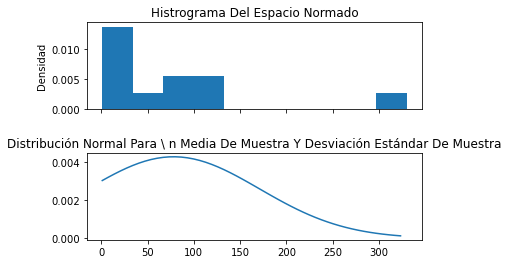

([1.0,
  7.58,
  14.16,
  20.740000000000002,
  27.32,
  33.9,
  40.480000000000004,
  47.06,
  53.64,
  60.22,
  66.8,
  73.38,
  79.96000000000001,
  86.54,
  93.12,
  99.7,
  106.28,
  112.86,
  119.44,
  126.02,
  132.6,
  139.18,
  145.76,
  152.34,
  158.92000000000002,
  165.5,
  172.08,
  178.66,
  185.24,
  191.82,
  198.4,
  204.98,
  211.56,
  218.14000000000001,
  224.72,
  231.3,
  237.88,
  244.46,
  251.04,
  257.62,
  264.2,
  270.78000000000003,
  277.36,
  283.94,
  290.52,
  297.1,
  303.68,
  310.26,
  316.84000000000003,
  323.42],
 [0.0030436941280150395,
  0.0032199635775976665,
  0.003389385629106679,
  0.0035498588092989685,
  0.0036993144412822716,
  0.0038357605437130374,
  0.003957325730527453,
  0.004062301768846044,
  0.004149183447609647,
  0.004216704458941581,
  0.004263868097796145,
  0.004289971740008139,
  0.004294624258609417,
  0.004277755775037969,
  0.0042396194054553134,
  0.004180784941175556,
  0.004102124683731816,
  0.004004791926750454,
  0

In [38]:
# Trazar histograma de tres gaussianos

gaussian_three.plot_histogram_pdf()

In [39]:
# Agregue uno gaussiano y dos gaussianos juntos

gaussian_one + gaussian_two

Media: 55 y Desviación Estándar: 3.605551275463989